# Imorting Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_path = r"E:\Learnings\Innomatics\AMCAT_EDA_Project\data.xlsx"
df = pd.read_excel(dataset_path)
ameo_df = df.copy()
ameo_df.head()

# Remove ID colunms

In [ ]:
ameo_df.drop(columns=["Unnamed: 0", "ID", "CollegeID", "CollegeCityID"], inplace=True)

# Rename the colunm names that are invalid variable names

In [ ]:
colunm_names = ameo_df.columns.values

In [ ]:
ameo_df.info()

In [ ]:
ameo_df.isnull().sum()

In [ ]:
ameo_df.duplicated().sum()

In [ ]:
ameo_df.nunique()

# Data type conversions

In [ ]:
ameo_df['DOL'].replace('present','2024-09-30', inplace =True)
ameo_df['DOL']=pd.to_datetime(ameo_df['DOL'])
ameo_df['DOJ']=pd.to_datetime(ameo_df['DOJ'])
ameo_df.head()                              

In [ ]:
categorical =['Designation','JobCity','Gender','10board','12board','CollegeTier','Degree','Specialization','CollegeCityTier','CollegeState']
for category in categorical:
    ameo_df[category] =ameo_df[category].astype('category')

In [ ]:
ameo_df.dtypes

In [ ]:
dates_missed = ameo_df[(ameo_df['DOL']<ameo_df['DOJ'])]
print(f'DOL is before than DOJ for {dates_missed.shape[0]} rows in the given dataset')
dates_missed.head()

In [ ]:
ameo_df = ameo_df.drop(ameo_df [~(ameo_df['DOL'] > ameo_df ['DOJ'])].index)
print(ameo_df.shape)

In [ ]:
ameo_df['Gender'].replace({'f':'girl','m':'boy'}, inplace =True)
ameo_df.head()

In [26]:
print((ameo_df['10percentage'] <=10).sum())
print((ameo_df['12percentage'] <=10).sum())
print((ameo_df['collegeGPA'] <=10).sum())

0
0
12


In [27]:
ameo_df.loc[ameo_df['collegeGPA']<=10,'collegeGPA'] = (ameo_df.loc[ameo_df['collegeGPA']<=10,'collegeGPA']/10)*100
ameo_df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,2024-09-30,senior quality engineer,Bangalore,girl,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,2024-09-30,assistant manager,Indore,boy,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,2024-09-30,systems engineer,Chennai,girl,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,2024-09-30,senior software engineer,Gurgaon,boy,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,boy,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [28]:
print((ameo_df==0).sum()[(ameo_df==0).sum() > 0])

10board             349
12board             358
CollegeCityTier    2761
GraduationYear        1
dtype: int64


In [29]:
(ameo_df==-1).sum()[(ameo_df==-1).sum()>0]/len(ameo_df)*100

JobCity                  11.361907
Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64

In [31]:
ameo_df = ameo_df.drop(columns = ['ElectricalEngg', 'TelecomEngg', 'CivilEngg','MechanicalEngg'])
ameo_df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,2024-09-30,senior quality engineer,Bangalore,girl,1990-02-19,84.3,"board ofsecondary education,ap",...,525,0.635979,445,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,2024-09-30,assistant manager,Indore,boy,1989-10-04,85.4,cbse,...,780,0.960603,-1,466,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,2024-09-30,systems engineer,Chennai,girl,1992-08-03,85.0,cbse,...,370,0.450877,395,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,2024-09-30,senior software engineer,Gurgaon,boy,1989-12-05,85.6,cbse,...,625,0.974396,615,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,boy,1991-02-27,78.0,cbse,...,465,0.124502,-1,233,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [36]:
# str replace
ameo_df['10board'] = ameo_df['10board'].astype(str)
ameo_df['12board'] = ameo_df['12board'].astype(str)
ameo_df['JobCity'] = ameo_df['JobCity'].astype(str)

# nan replace
ameo_df['10board'] = ameo_df['10board'].replace({'0':np.nan})
ameo_df['12board'] = ameo_df['12board'].replace({'0':np.nan})
ameo_df['GraduationYear'] = ameo_df['GraduationYear'].replace({0:np.nan})
ameo_df['JobCity'] = ameo_df['JobCity'].replace({'-1':np.nan})
ameo_df['Domain'] = ameo_df['Domain'].replace({-1:np.nan})
ameo_df['ComputerProgramming'] = ameo_df['ComputerProgramming'].replace({-1:np.nan})

# -1 replace with zero
ameo_df['ElectronicsAndSemicon'] = ameo_df['ElectronicsAndSemicon'].replace({-1:0})
ameo_df['ComputerScience'] = ameo_df['ComputerScience'].replace({-1:0})

# change datatype to category
ameo_df['10board'] = ameo_df['10board'].astype('category')
ameo_df['12board'] = ameo_df['12board'].astype('category')
ameo_df['JobCity'] = ameo_df['JobCity'].astype('category')

In [ ]:
ameo_df.describe()

In [38]:
# Median imputing 

ameo_df['Domain'].fillna(ameo_df['Domain'].median(), inplace = True)
ameo_df['ComputerProgramming'].fillna(ameo_df['ComputerProgramming'].median(), inplace = True)

# Mode imputing 
ameo_df['10board'].fillna(ameo_df['10board'].mode()[0], inplace = True)
ameo_df['12board'].fillna(ameo_df['12board'].mode()[0], inplace = True)
ameo_df['GraduationYear'].fillna(ameo_df['GraduationYear'].mode()[0], inplace = True)
ameo_df['JobCity'].fillna(ameo_df['JobCity'].mode()[0], inplace = True)


In [39]:
def correct_string_data(data):
    '''
    Convert the textual categories to lower case
    and remove the leading or trailing spaces if any.

    '''
    ameo_df[data] = ameo_df[data].str.lower().str.strip()
    
textual_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']
for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {ameo_df[col].nunique()}')

for col in textual_columns:
    correct_string_data(col)

Number of unique values in Designation with inconsistency : 416
Number of unique values in JobCity with inconsistency : 338
Number of unique values in 10board with inconsistency : 275
Number of unique values in 12board with inconsistency : 340
Number of unique values in Specialization with inconsistency : 46
Number of unique values in CollegeState with inconsistency : 26


In [ ]:
def collapsing_categories(ameo_df, data):
    for Designation in ameo_df[data].unique():
        min_count = ameo_df[data].value_counts()[:10].min()
        if ameo_df[ameo_df[data] == Designation][data].value_counts()[0] < min_count:
            ameo_df.loc[ameo_df[data] == Designation, data] = 'other'

for cols in textual_columns:
    collapsing_categories(ameo_df, cols)

for cols in textual_columns:
    print('')
    print('Top 10 categories in:', cols)
    print('')
    print(ameo_df[cols].value_counts())
    print('')
    print('*'*100)

In [41]:
# Adding AGE column

ameo_df['DOB'] = pd.to_datetime(ameo_df['DOB'])
ameo_df['AGE'] = 2024 - ameo_df['DOB'].dt.year
ameo_df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,AGE
0,203097,420000,2012-06-01,2024-09-30,other,bangalore,girl,1990-02-19,84.3,other,...,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,34
1,579905,500000,2013-09-01,2024-09-30,other,other,boy,1989-10-04,85.4,cbse,...,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,35
2,810601,325000,2014-06-01,2024-09-30,systems engineer,chennai,girl,1992-08-03,85.0,cbse,...,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,32
3,267447,1100000,2011-07-01,2024-09-30,senior software engineer,gurgaon,boy,1989-12-05,85.6,cbse,...,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,35
4,343523,200000,2014-03-01,2015-03-01,other,other,boy,1991-02-27,78.0,cbse,...,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,33


In [42]:
delta = (ameo_df['DOL'] - ameo_df['DOJ'])
tenure = np.zeros(len(ameo_df))
for i, date in enumerate(delta):
    tenure[i] = round(date.days/365,2)
ameo_df['Work_experience'] = tenure

In [43]:
ameo_df = ameo_df.drop(ameo_df[(ameo_df['GraduationYear'] > ameo_df['DOJ'].dt.year)].index)

# Univariate Analysis

## Numerical 
1 Salary \
2 Work_experience \
3 GraduationYear \
4 AGE 

## Categorical 
1 10board \
2 12board \
3 Designation \
4 JobCity \
5 Degree 

In [51]:
# Box plot
def box_plot(colunm_name,dataframe):
    plt.figure(figsize=(5,4))
    sns.boxplot(dataframe[colunm_name])
    plt.xlabel(colunm_name)
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

# Summary Stats
def summary_stats(colunm_name,dataframe):
    plt.figure(figsize=(5,4))
    dataframe[colunm_name].describe()[1:].plot(alpha = 0.8,
                                     marker = 'D', markersize = 8)
    plt.title(f'Summary Statistics for {colunm_name} ')
    plt.xlabel('Statistical Measures')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

****************** Salary ********************* 




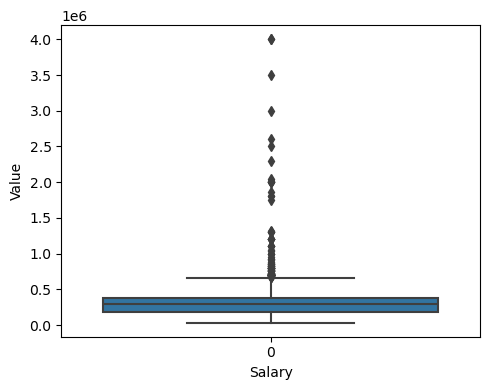

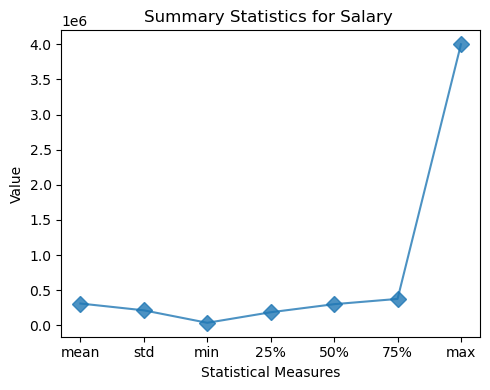

******************************************************** 


****************** Work_experience ********************* 




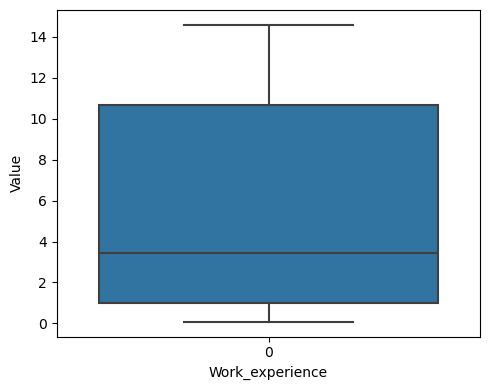

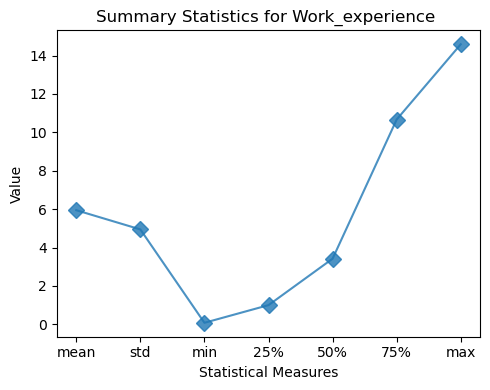

******************************************************** 


****************** GraduationYear ********************* 




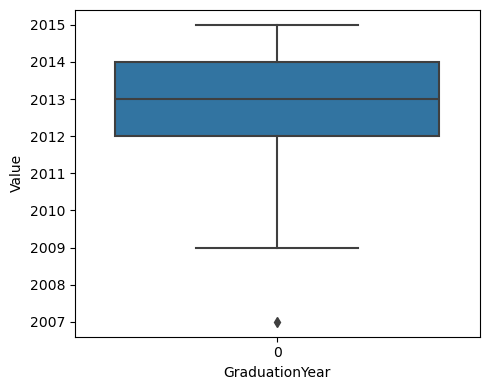

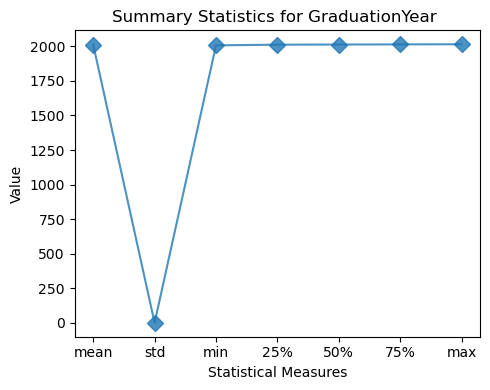

******************************************************** 


****************** AGE ********************* 




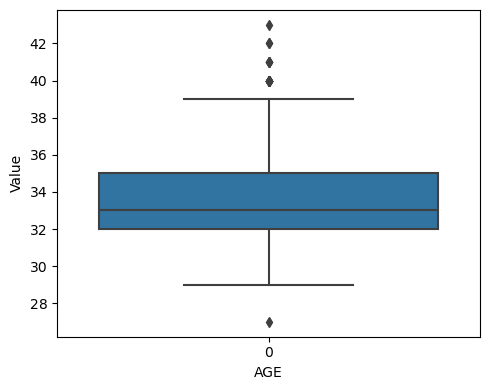

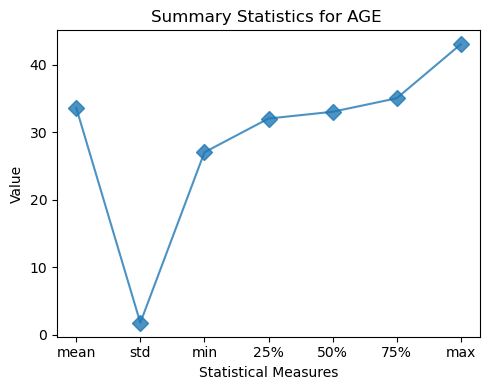

******************************************************** 




In [52]:
for numerical_var in ['Salary','Work_experience','GraduationYear','AGE']:
    print(f"****************** {numerical_var} *********************","\n"*2)
    box_plot(numerical_var,ameo_df)
    summary_stats(numerical_var,ameo_df)
    print(f"********************************************************", "\n"*2)

In [57]:
# Barh plot
def barh_plot(column_name,dataframe):
    dataframe[column_name].value_counts()[1:].sort_values(
        ascending=True
    ).plot(
        kind='barh',
        title=f'{column_name} Counts',
        figsize=(7, 3),
        ec='k'
    )
    plt.ylabel('column_name')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.show()

********************************* 10board ************************************************* 




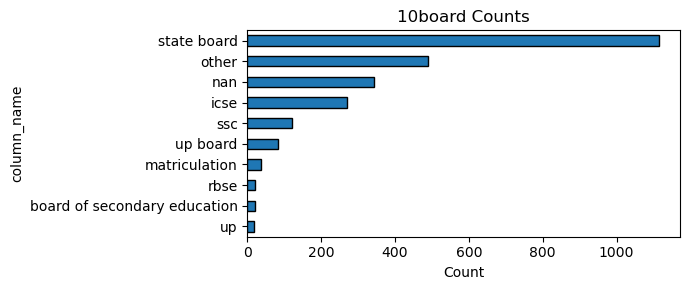

***************************************************************************************************** 


********************************* 12board ************************************************* 




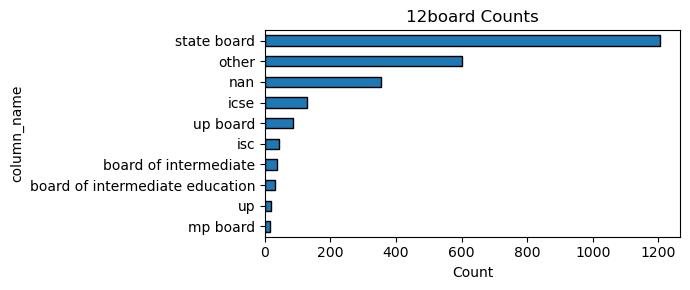

***************************************************************************************************** 


********************************* Designation ************************************************* 




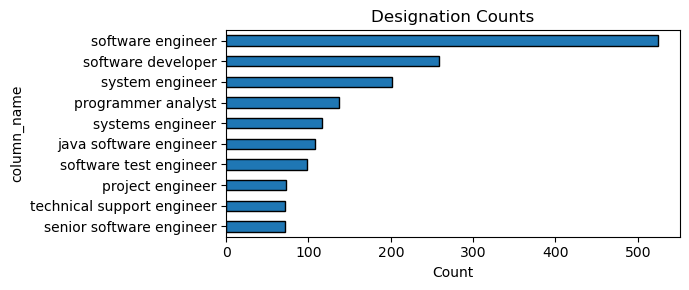

***************************************************************************************************** 


********************************* JobCity ************************************************* 




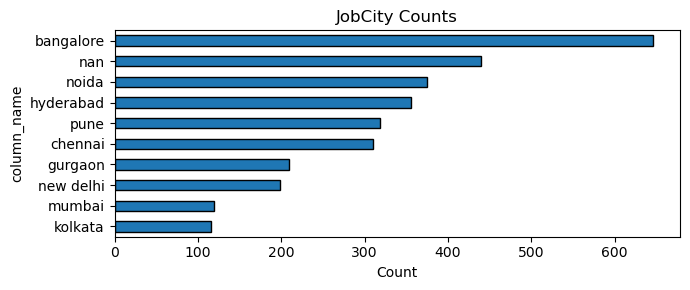

***************************************************************************************************** 


********************************* Degree ************************************************* 




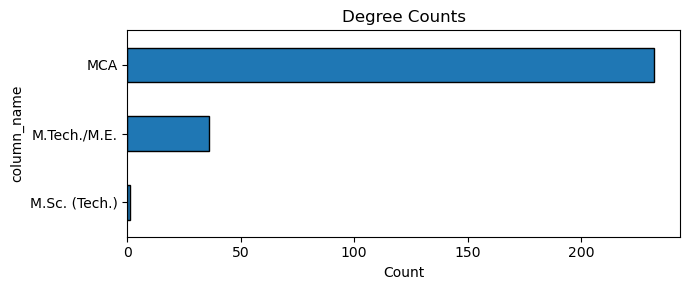

***************************************************************************************************** 




In [62]:
for categorical_var in ['10board','12board','Designation' ,'JobCity','Degree' ]:
    print(f"********************************* {categorical_var} *************************************************","\n"*2)
    barh_plot(categorical_var,ameo_df)
    print(f"*****************************************************************************************************", "\n"*2)

In [64]:
def outlier_removal(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [66]:
columns = ['Salary','10percentage','12percentage','AGE', 'Work_experience']

clean_ameo_df = ameo_df.copy()

for cols in columns:
    lowerbound, upperbound = outlier_removal(clean_ameo_df[cols])

    clean_ameo_df = clean_ameo_df.drop(clean_ameo_df[(clean_ameo_df[cols] < lowerbound) | (clean_ameo_df[cols] > upperbound)].index)

print(f'Number of observation with outliers: {ameo_df.shape[0]}')
print(f'Number of observations without outliers: {clean_ameo_df.shape[0]}')

Number of observation with outliers: 3864
Number of observations without outliers: 3711


# Bivariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


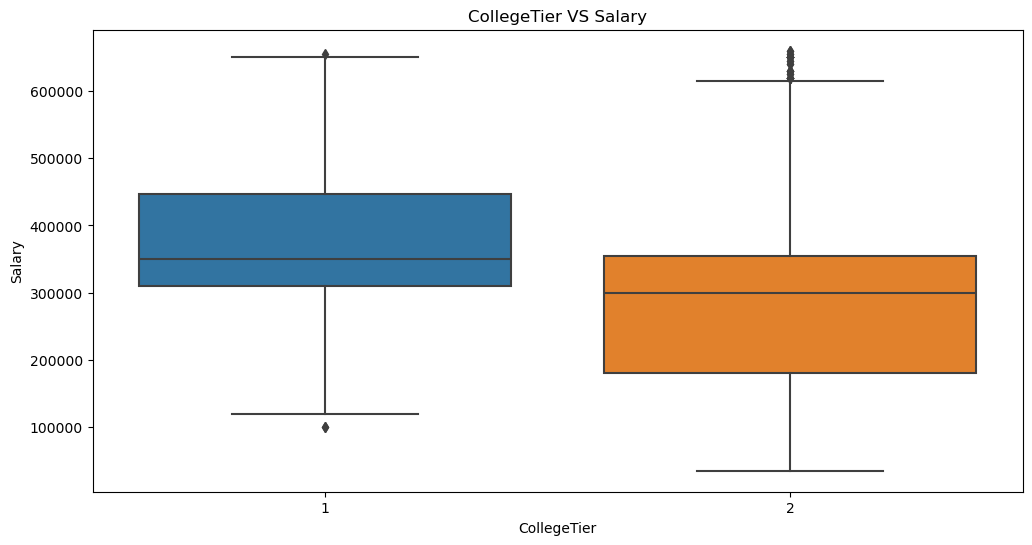

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(y="Salary", x="CollegeTier", data=clean_ameo_df)
plt.title("CollegeTier VS Salary")
plt.show()

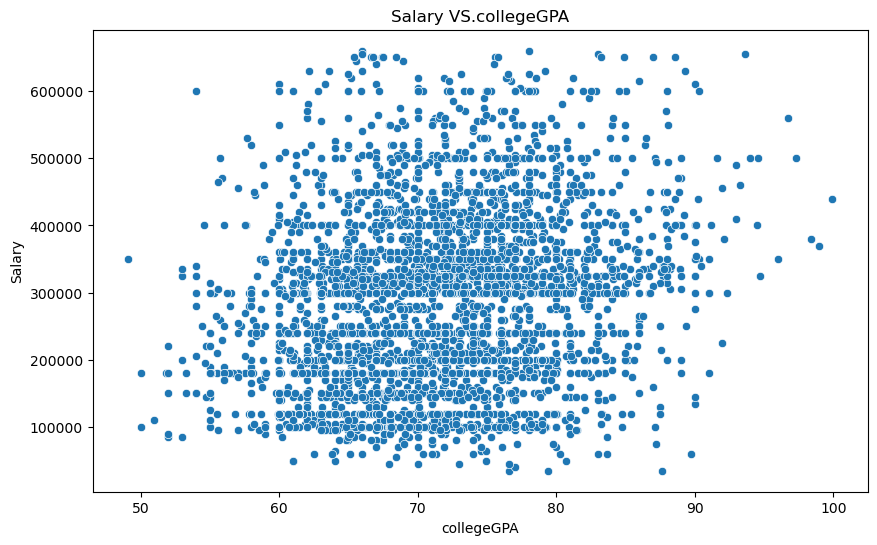

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="collegeGPA", y="Salary",data=clean_ameo_df)
plt.title("Salary VS.collegeGPA")
plt.show()

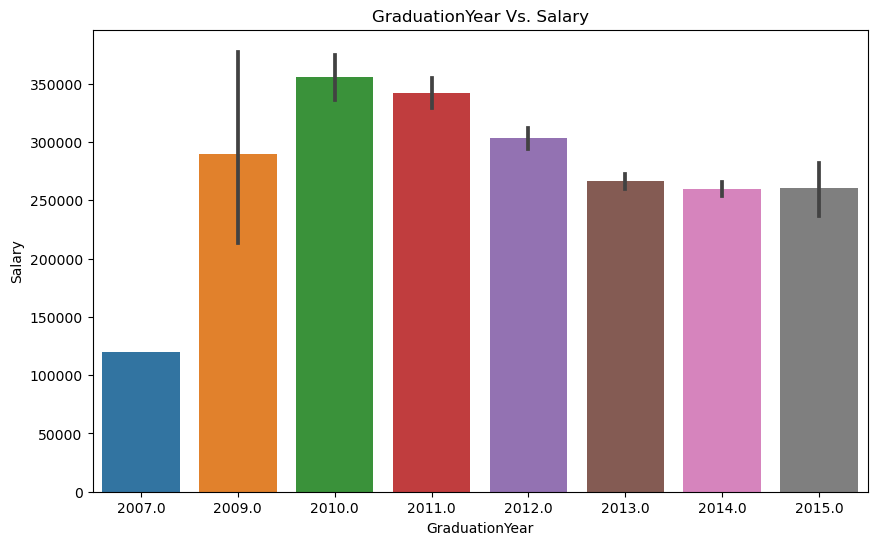

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(x="GraduationYear", y="Salary", data=clean_ameo_df)
plt.title("GraduationYear Vs. Salary")
plt.show()

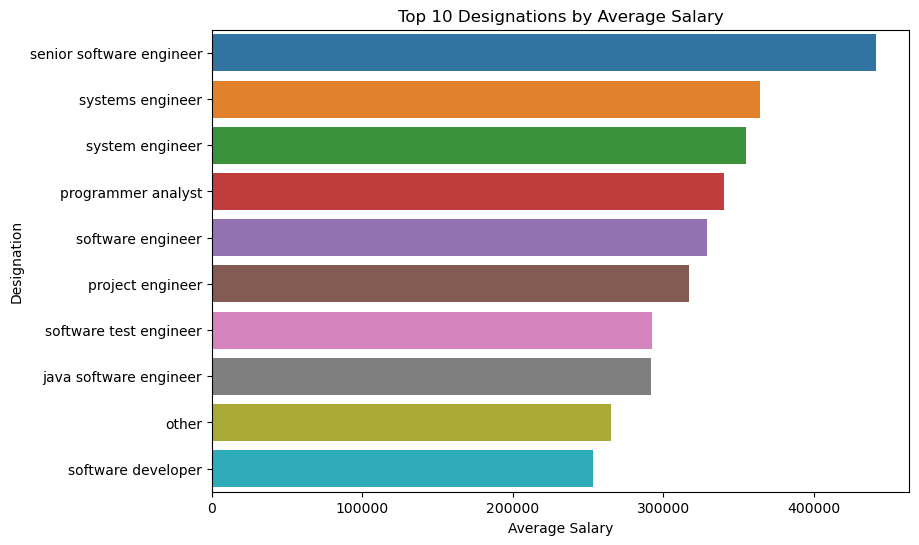

In [70]:
top_designations = clean_ameo_df.groupby('Designation')['Salary'].mean().nlargest(10).reset_index()

# Create the plot
plt.figure(figsize=(9, 6))
sns.barplot(y="Designation", x="Salary", data=top_designations)
plt.title("Top 10 Designations by Average Salary")
plt.xlabel("Average Salary")
plt.ylabel("Designation")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 900x600 with 0 Axes>

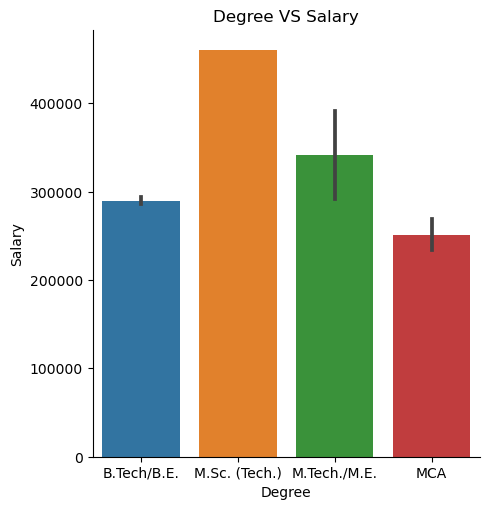

In [72]:
plt.figure(figsize=(9,6))
sns.catplot(x="Degree", y="Salary", kind="bar", data=clean_ameo_df)
plt.title("Degree VS Salary")
plt.show()

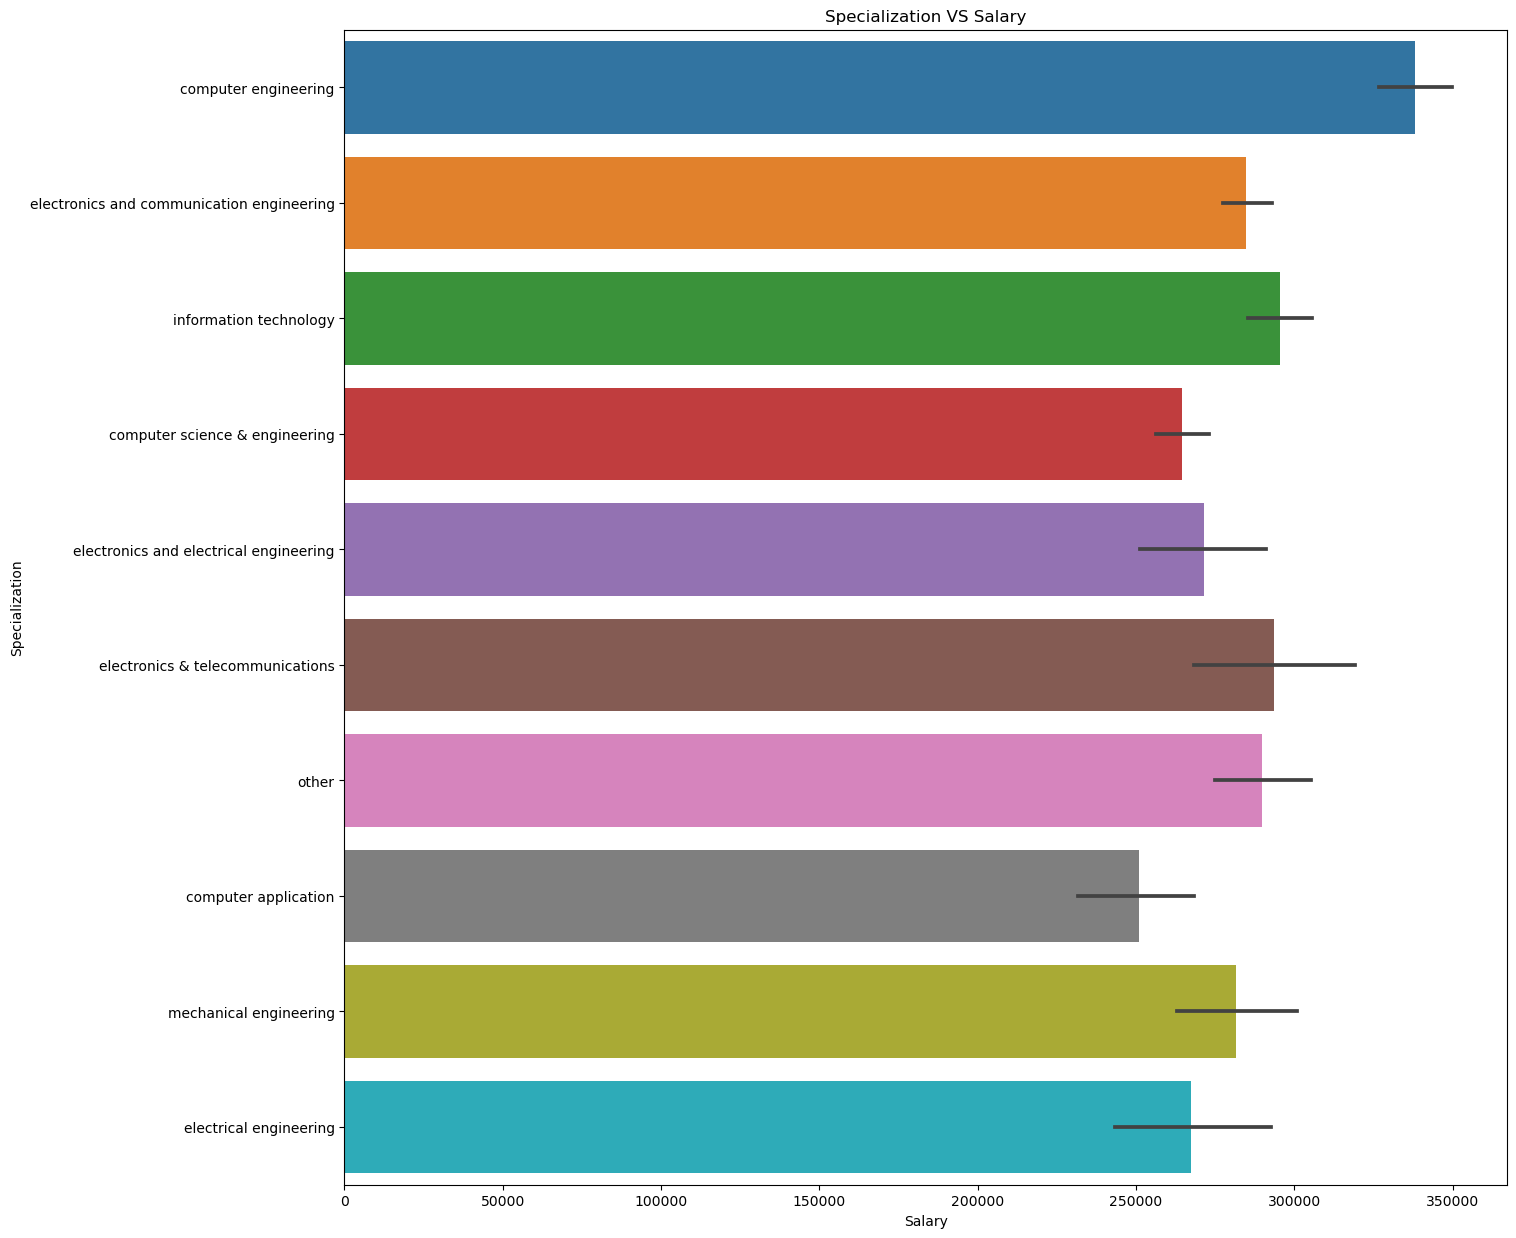

In [77]:
plt.figure(figsize=(15,15))
sns.barplot(y="Specialization", x="Salary", data=clean_ameo_df)
plt.title("Specialization VS Salary")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 2500x2000 with 0 Axes>

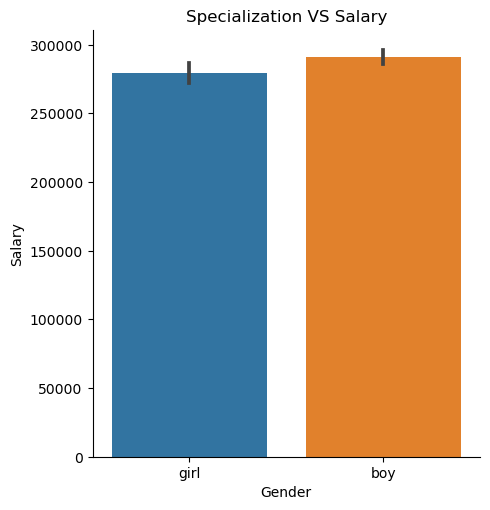

In [78]:
plt.figure(figsize=(25,20))
sns.catplot(x="Gender", y="Salary", kind="bar", data=clean_ameo_df)
plt.title("Specialization VS Salary")
plt.show()

In [81]:
grouped_new_df = clean_ameo_df.groupby(['Designation', 'Specialization']).agg({'Salary': 'mean'}).reset_index()

# Checking if the average salaries are within the range of 2.5-3 lakhs

lower_bound = 250000
upper_bound = 300000
result = (clean_ameo_df['Salary'] >= lower_bound) & (clean_ameo_df['Salary'] <= upper_bound)

if result.all():
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")

The claim is not supported by the data.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

<Figure size 2000x2000 with 0 Axes>

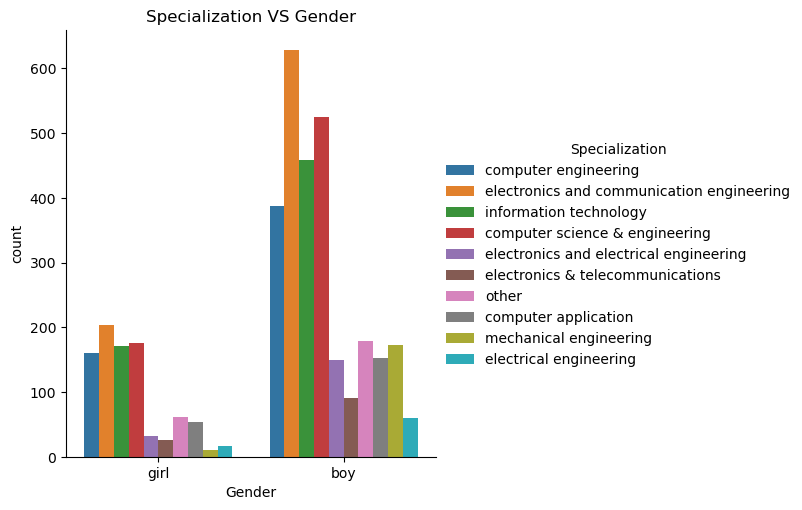

In [80]:
plt.figure(figsize=(20,20))
sns.catplot(x="Gender", hue="Specialization", kind="count", data=clean_ameo_df)
plt.title("Specialization VS Gender")
plt.show()